In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from plotting_utils import save_figure
import umap
from tfidf_transformers import TfidfTransformer
from dimensionality_reduction import pca_reduction, tsne_reduction, umap_reduction
from k_means_clusters import cluster_and_visualize, cluster_from_file
import pickle

In [2]:
# read in processed data_all

df = pd.read_csv('/Users/annabzinkowska/DTU/DTU_master_thesis/00_data/processed_data_all_vol_2.csv')

In [3]:
transformer = TfidfTransformer(max_features=None, min_df=0.005, max_df = 0.99)  

tfidf_matrix, feature_names = transformer.fit_transform(df, 'description')

Result Type:  <class 'numpy.ndarray'>
Feature Names Type:  <class 'numpy.ndarray'>


In [4]:
len(feature_names)

169

In [5]:
feature_names

array(['actuator', 'air', 'asep', 'aseptic', 'asme', 'assembly', 'bal',
       'balanced', 'ball', 'bar', 'basic', 'bc', 'bearing', 'bend', 'bl',
       'blasted', 'body', 'bpe', 'bs', 'bsp', 'butterfly', 'cap',
       'change', 'cip', 'cl', 'cla', 'clamp', 'clean', 'complete',
       'cover', 'cp', 'din', 'dms', 'dn', 'double', 'dv', 'end', 'ends',
       'ep', 'epdm', 'ferrule', 'fgd', 'fl', 'flange', 'flush', 'flushed',
       'forged', 'fpm', 'fss', 'gasket', 'gj', 'handle', 'hd', 'hnbr',
       'hsf', 'hz', 'id', 'iec', 'impeller', 'inch', 'inside', 'iso',
       'item', 'kit', 'kv', 'kw', 'legs', 'line', 'liner', 'lip', 'lkb',
       'lkc', 'lkdc', 'lkh', 'lkla', 'lksf', 'lo', 'long', 'lower', 'ls',
       'maintainable', 'male', 'man', 'manhole', 'manual', 'mat',
       'mechanical', 'mixproof', 'mp', 'mr', 'nbr', 'nc', 'none', 'npt',
       'nut', 'nw', 'od', 'part', 'pin', 'pipe', 'pl', 'plug', 'pm',
       'pneu', 'pol', 'polished', 'positions', 'pressure', 'prime',
       'p

## Reduction and Clustering

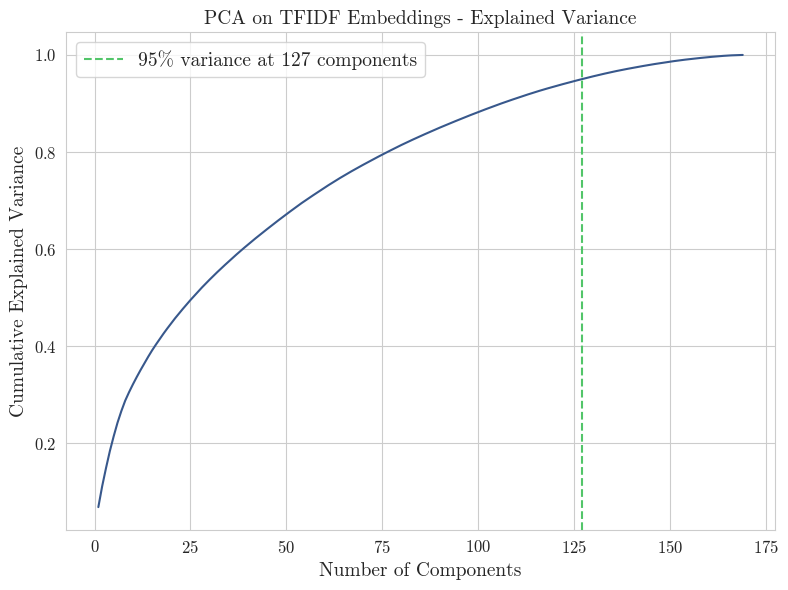

In [6]:
X_pca = pca_reduction(tfidf_matrix, feature_type='TFIDF')

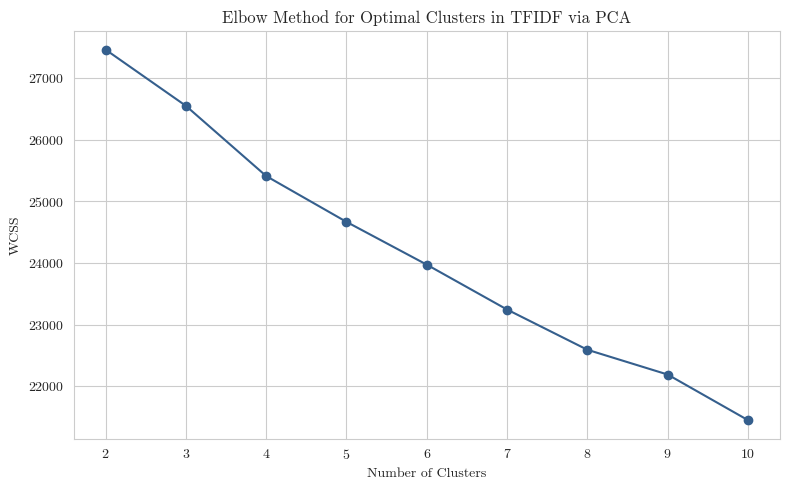

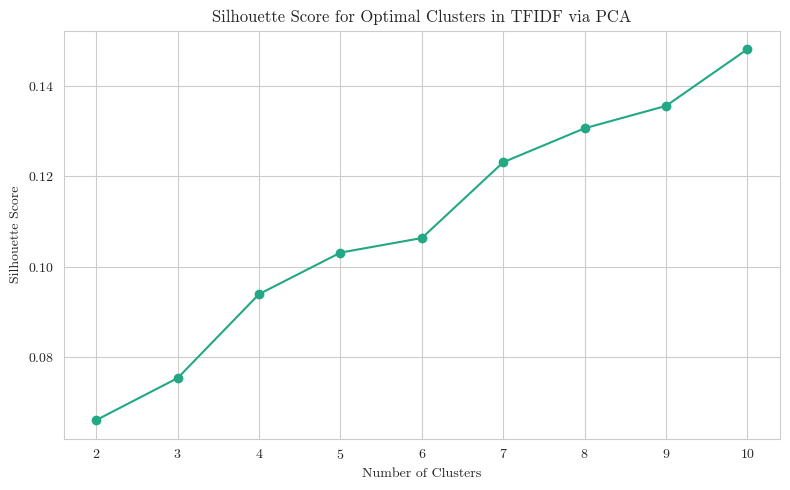

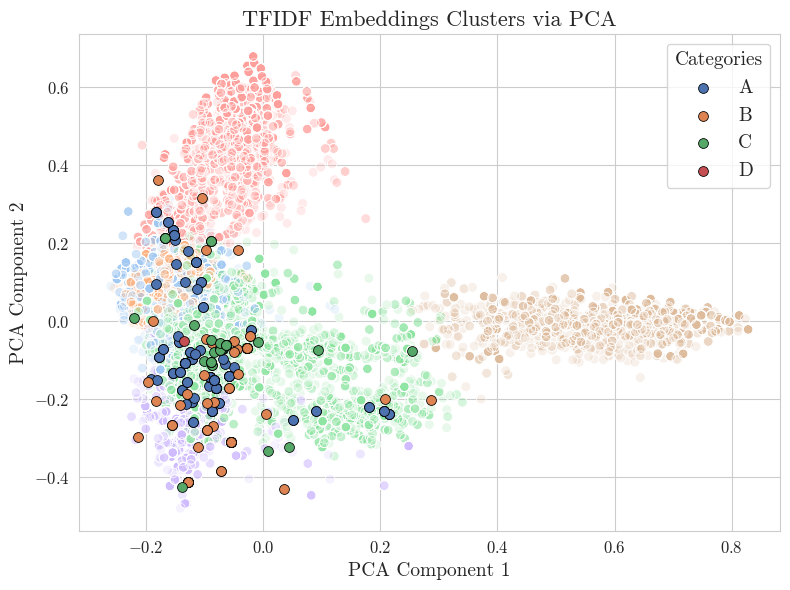

product_id                             description  month_mode  \
0         010004  cfcf sfy bolted hanger nptf stud viton           2   
1         010005  cfcf sfy bolted hanger nptf stud viton          10   
2         010006  cfcf sfy bolted hanger nptf stud viton          10   
3         010015  cfcf sfy bolted hanger nptf stud viton           1   
4         010040  cfcf sfy bolted hanger nptf stud viton           1   
...          ...                                     ...         ...   
34126     TE929K                           slide bearing           3   
34127   TE980931              weld adapt tz npt sch pipe          12   
34128    TEB6042                            bottom liner          10   
34129    TEB604Z                                    stem           6   
34130     TEB605                                impeller           3   

       quarter_mode  year_mode  day_week_mode  quantity_sum  price_sum  \
0                 1       2020              2             6     232.92   
1                 4       2019              2           200    1774.00   
2                 4       2019              2           300    1848.00   
3                 1       2019              2           300    2115.00   
4                 1       2019              2           400    3119.00   
...             ...        ...            ...           ...        ...   
34126             1       2016              4           636   15681.71   
34127             4       2017              4             6     524.95   
34128             3       2017              1           158    1827.25   
34129             1       2020              1            13    2586.04   
34130             1       2019              1            14     939.68   

       unit_weight customer_country_mode  customer_country_count  \
0            0.124                    DK                       1   
1            0.259                    CO                       1   
2            0.276                    CO                       1   
3            0.318                    SE                       2   
4            0.363                    CO                       2   
...            ...                   ...                     ...   
34126        0.011                    US                      20   
34127        0.270                    GB                       2   
34128        0.038                    SE                      15   
34129        1.150                    US                       4   
34130        0.120                    SE                       1   

       customer_id_count category  unit_price_mean  \
0                      1       -1          38.8200   
1                      1       -1           8.8700   
2                      1       -1           6.1600   
3                      2       -1           7.0500   
4                      2       -1           7.7975   
...                  ...      ...              ...   
34126                 23       -1          24.6568   
34127                  2       -1          87.4917   
34128                 18       -1          11.5649   
34129                  6       -1         198.9262   
34130                  1       -1          67.1200   

                                    description_original  \
0      C24FCF-1/2-SFY-S              BOLTED HANGER, N...   
1      C24FCF-1-SFY-S                BOLTED HANGER, N...   
2      C24FCF-1 1/2-SFY-S            BOLTED HANGER, N...   
3      C24FCF-2-SFY-S                BOLTED HANGER, N...   
4      C24FCF-3-SFY-S                BOLTED HANGER, N...   
...                                                  ...   
34126  SLIDE BEARING                                 ...   
34127  WELD.ADAPT. TZ-74             NPT/1½"SCH40 PIP...   
34128  BOTTOM LINER                                  ...   
34129  STEM                                          ...   
34130  IMPELLER                                      ...   

       TFIDF_PCA_Cluster_Labels  TFIDF_PCA_Distance_to_Centroid  

In [7]:
cluster_and_visualize(X_pca, df, reduction_method_name="PCA", feature_type="TFIDF")

### t-SNE

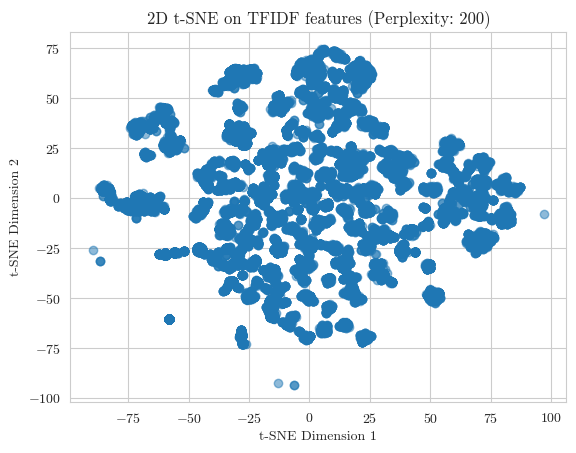

In [8]:
X_tsne = tsne_reduction(tfidf_matrix, perplexity=200, metric='cosine', feature_type='TFIDF')

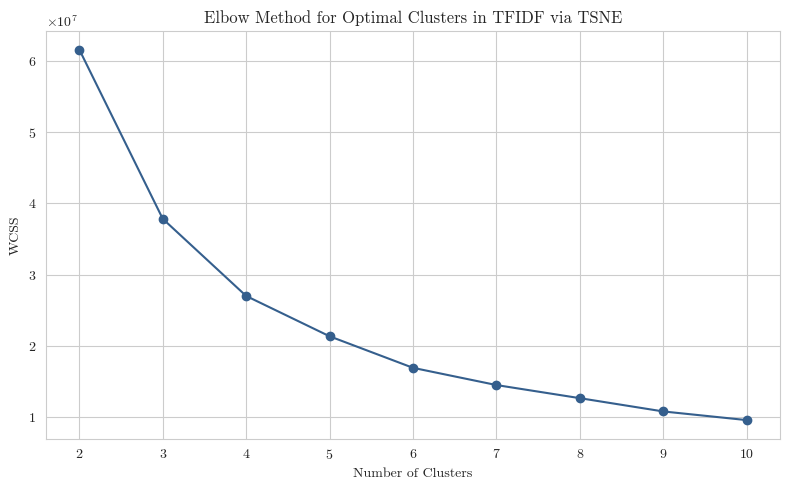

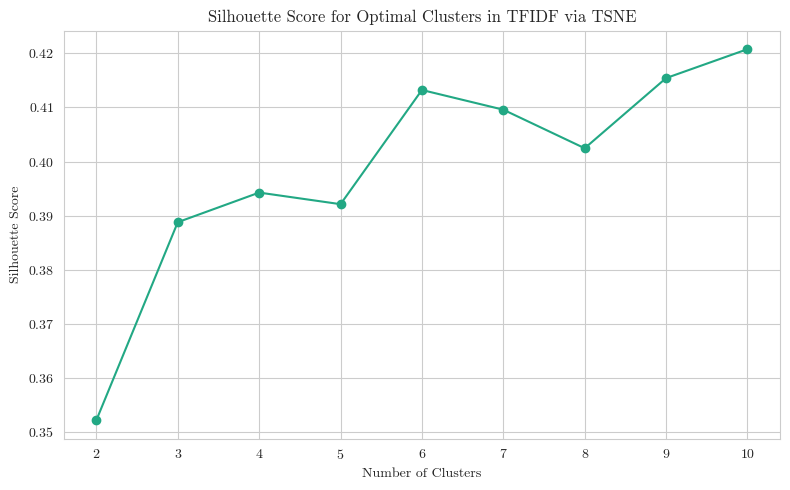

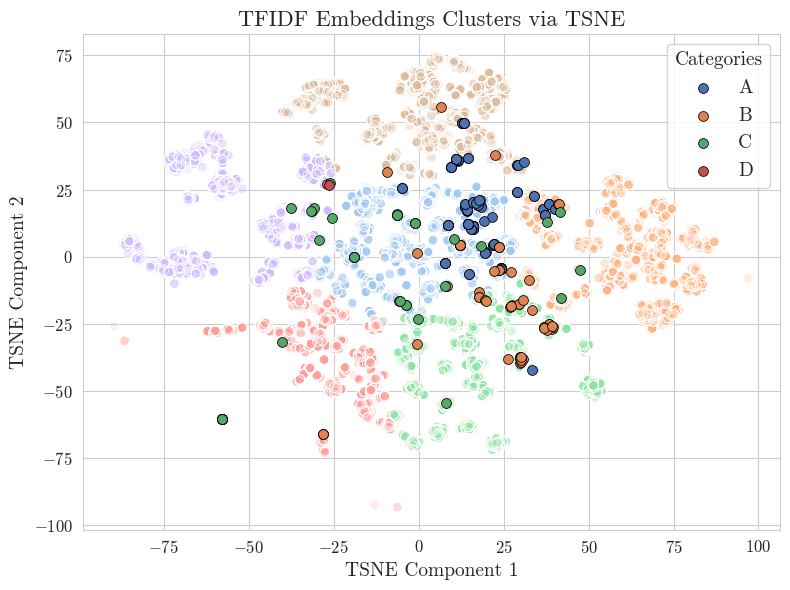

product_id                             description  month_mode  \
0         010004  cfcf sfy bolted hanger nptf stud viton           2   
1         010005  cfcf sfy bolted hanger nptf stud viton          10   
2         010006  cfcf sfy bolted hanger nptf stud viton          10   
3         010015  cfcf sfy bolted hanger nptf stud viton           1   
4         010040  cfcf sfy bolted hanger nptf stud viton           1   
...          ...                                     ...         ...   
34126     TE929K                           slide bearing           3   
34127   TE980931              weld adapt tz npt sch pipe          12   
34128    TEB6042                            bottom liner          10   
34129    TEB604Z                                    stem           6   
34130     TEB605                                impeller           3   

       quarter_mode  year_mode  day_week_mode  quantity_sum  price_sum  \
0                 1       2020              2             6     232.92   
1                 4       2019              2           200    1774.00   
2                 4       2019              2           300    1848.00   
3                 1       2019              2           300    2115.00   
4                 1       2019              2           400    3119.00   
...             ...        ...            ...           ...        ...   
34126             1       2016              4           636   15681.71   
34127             4       2017              4             6     524.95   
34128             3       2017              1           158    1827.25   
34129             1       2020              1            13    2586.04   
34130             1       2019              1            14     939.68   

       unit_weight customer_country_mode  customer_country_count  \
0            0.124                    DK                       1   
1            0.259                    CO                       1   
2            0.276                    CO                       1   
3            0.318                    SE                       2   
4            0.363                    CO                       2   
...            ...                   ...                     ...   
34126        0.011                    US                      20   
34127        0.270                    GB                       2   
34128        0.038                    SE                      15   
34129        1.150                    US                       4   
34130        0.120                    SE                       1   

       customer_id_count category  unit_price_mean  \
0                      1       -1          38.8200   
1                      1       -1           8.8700   
2                      1       -1           6.1600   
3                      2       -1           7.0500   
4                      2       -1           7.7975   
...                  ...      ...              ...   
34126                 23       -1          24.6568   
34127                  2       -1          87.4917   
34128                 18       -1          11.5649   
34129                  6       -1         198.9262   
34130                  1       -1          67.1200   

                                    description_original  \
0      C24FCF-1/2-SFY-S              BOLTED HANGER, N...   
1      C24FCF-1-SFY-S                BOLTED HANGER, N...   
2      C24FCF-1 1/2-SFY-S            BOLTED HANGER, N...   
3      C24FCF-2-SFY-S                BOLTED HANGER, N...   
4      C24FCF-3-SFY-S                BOLTED HANGER, N...   
...                                                  ...   
34126  SLIDE BEARING                                 ...   
34127  WELD.ADAPT. TZ-74             NPT/1½"SCH40 PIP...   
34128  BOTTOM LINER                                  ...   
34129  STEM                                          ...   
34130  IMPELLER                                      ...   

       TFIDF_PCA_Cluster_Labels  TFIDF_PCA_Distance_to_Centroid  

In [9]:
cluster_and_visualize(X_tsne, df, reduction_method_name="TSNE", feature_type="TFIDF")

### UMAP

/Users/annabzinkowska/anaconda3/envs/thesis_/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/annabzinkowska/anaconda3/envs/thesis_/lib/python3.10/site-packages/pynndescent/pynndescent_.py:358: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/Users/annabzinkowska/anaconda3/envs/thesis_/lib/python3.10/site-packages/numba/core/types/functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  nn_descent_internal_low_memory_parallel(


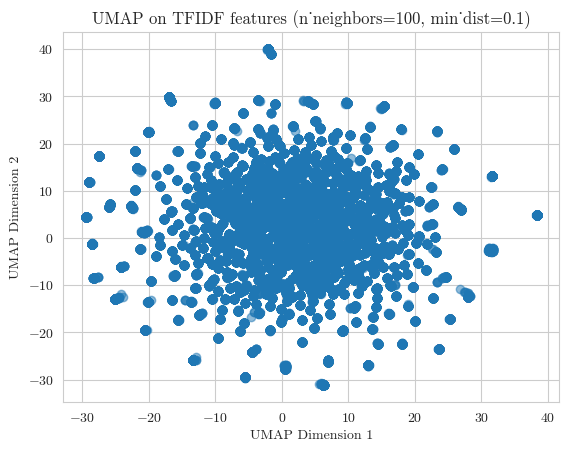

In [10]:
X_umap = umap_reduction(tfidf_matrix, n_neighbors=100, min_dist=0.1, metric='cosine', feature_type='TFIDF')

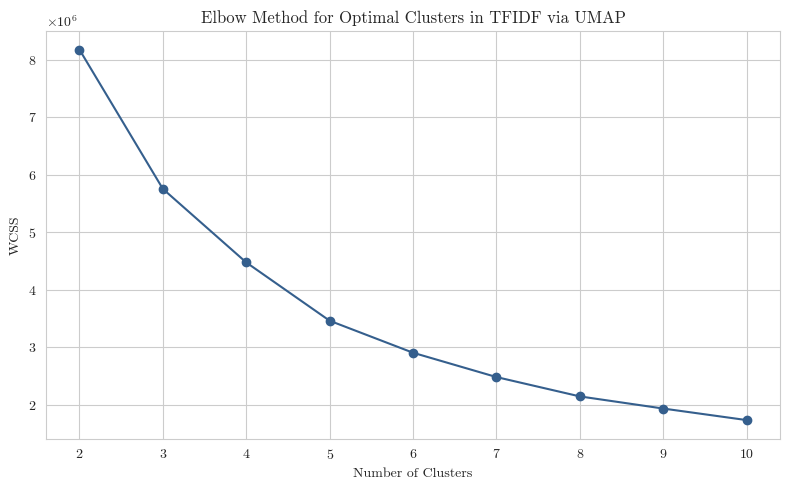

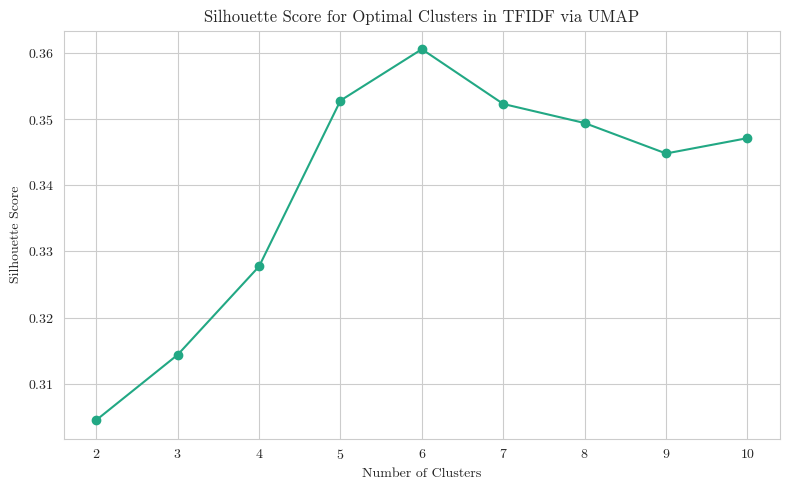

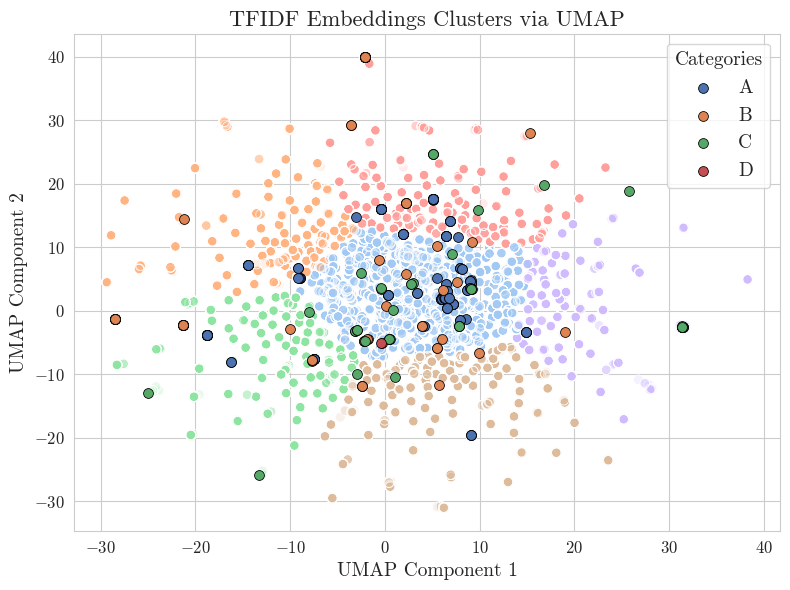

product_id                             description  month_mode  \
0         010004  cfcf sfy bolted hanger nptf stud viton           2   
1         010005  cfcf sfy bolted hanger nptf stud viton          10   
2         010006  cfcf sfy bolted hanger nptf stud viton          10   
3         010015  cfcf sfy bolted hanger nptf stud viton           1   
4         010040  cfcf sfy bolted hanger nptf stud viton           1   
...          ...                                     ...         ...   
34126     TE929K                           slide bearing           3   
34127   TE980931              weld adapt tz npt sch pipe          12   
34128    TEB6042                            bottom liner          10   
34129    TEB604Z                                    stem           6   
34130     TEB605                                impeller           3   

       quarter_mode  year_mode  day_week_mode  quantity_sum  price_sum  \
0                 1       2020              2             6     232.92   
1                 4       2019              2           200    1774.00   
2                 4       2019              2           300    1848.00   
3                 1       2019              2           300    2115.00   
4                 1       2019              2           400    3119.00   
...             ...        ...            ...           ...        ...   
34126             1       2016              4           636   15681.71   
34127             4       2017              4             6     524.95   
34128             3       2017              1           158    1827.25   
34129             1       2020              1            13    2586.04   
34130             1       2019              1            14     939.68   

       unit_weight customer_country_mode  ...  customer_id_count  category  \
0            0.124                    DK  ...                  1        -1   
1            0.259                    CO  ...                  1        -1   
2            0.276                    CO  ...                  1        -1   
3            0.318                    SE  ...                  2        -1   
4            0.363                    CO  ...                  2        -1   
...            ...                   ...  ...                ...       ...   
34126        0.011                    US  ...                 23        -1   
34127        0.270                    GB  ...                  2        -1   
34128        0.038                    SE  ...                 18        -1   
34129        1.150                    US  ...                  6        -1   
34130        0.120                    SE  ...                  1        -1   

      unit_price_mean                               description_original  \
0             38.8200  C24FCF-1/2-SFY-S              BOLTED HANGER, N...   
1              8.8700  C24FCF-1-SFY-S                BOLTED HANGER, N...   
2              6.1600  C24FCF-1 1/2-SFY-S            BOLTED HANGER, N...   
3              7.0500  C24FCF-2-SFY-S                BOLTED HANGER, N...   
4              7.7975  C24FCF-3-SFY-S                BOLTED HANGER, N...   
...               ...                                                ...   
34126         24.6568  SLIDE BEARING                                 ...   
34127         87.4917  WELD.ADAPT. TZ-74             NPT/1½"SCH40 PIP...   
34128         11.5649  BOTTOM LINER                                  ...   
34129        198.9262  STEM                                          ...   
34130         67.1200  IMPELLER                                      ...   

      TFIDF_PCA_Cluster_Labels  TFIDF_PCA_Distance_to_Centroid  \
0                            2                        0.155563   
1                            2                        0.155563   
2                            2                        0.155563   
3                            2                        0.155563   
4                            2                        0.155563   
...   

In [11]:
cluster_and_visualize(X_umap, df, reduction_method_name="UMAP", feature_type="TFIDF")

In [ ]:
# wordclouds of clusters for each dim reduction method

In [27]:
# save df as df_TFIDF_clusters in data folder using to.csv
# df.to_csv('/Users/annabzinkowska/DTU/master_thesis/data/df_TFIDF_clusters_vol_2.csv', index=False)

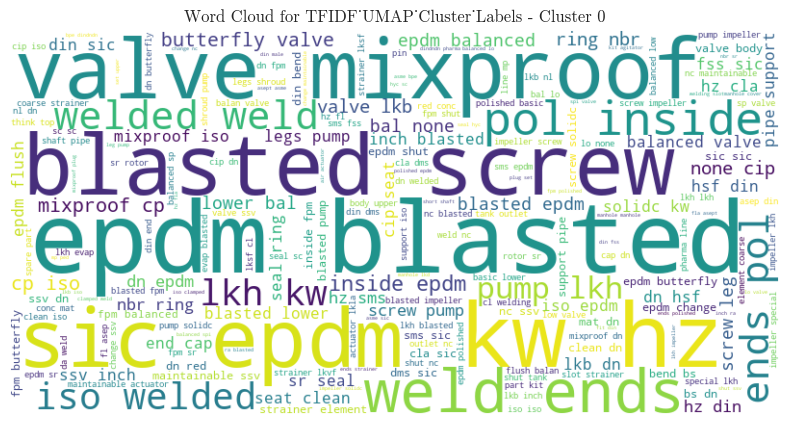

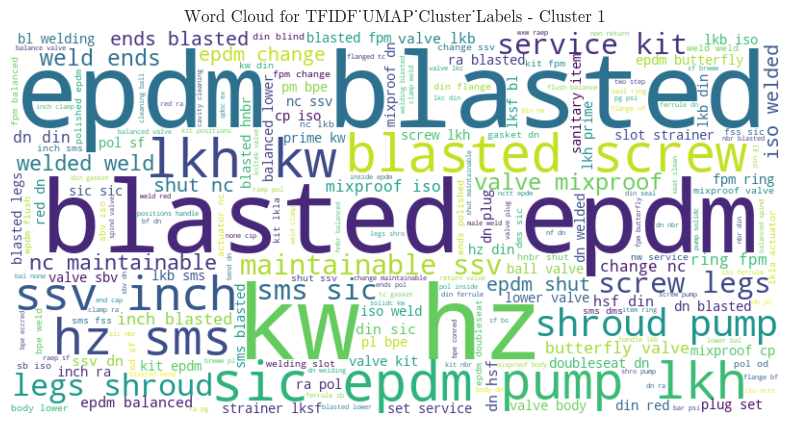

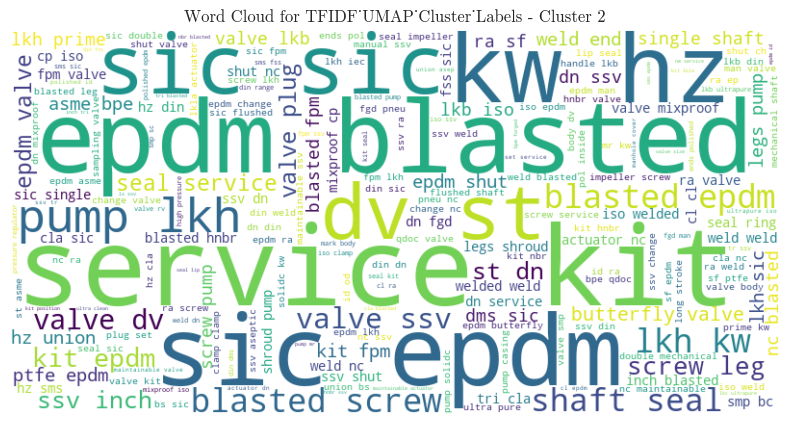

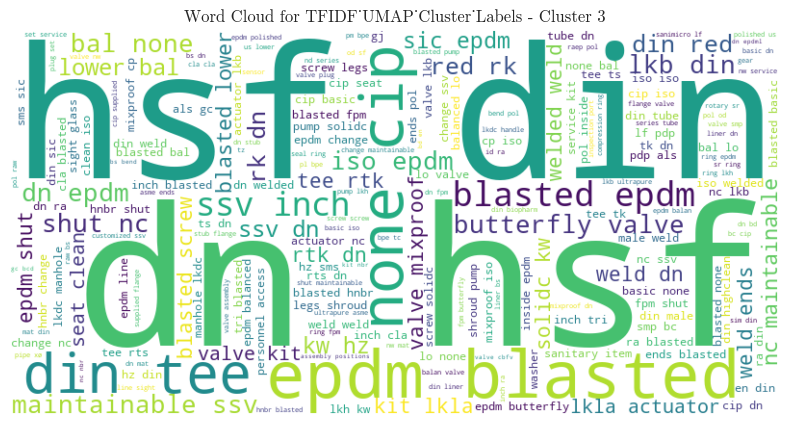

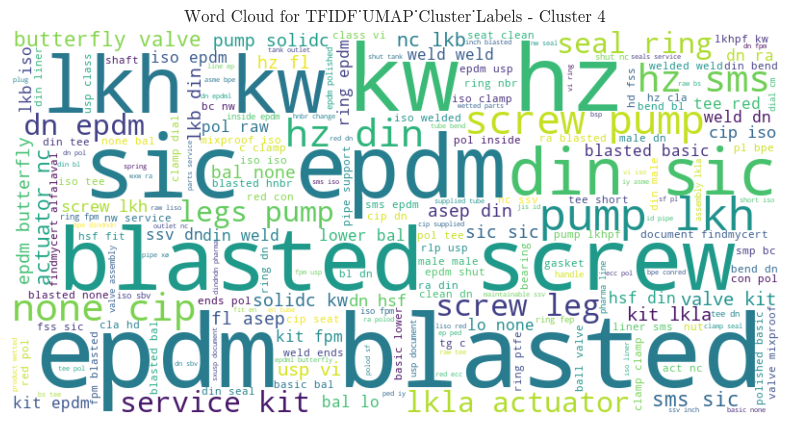

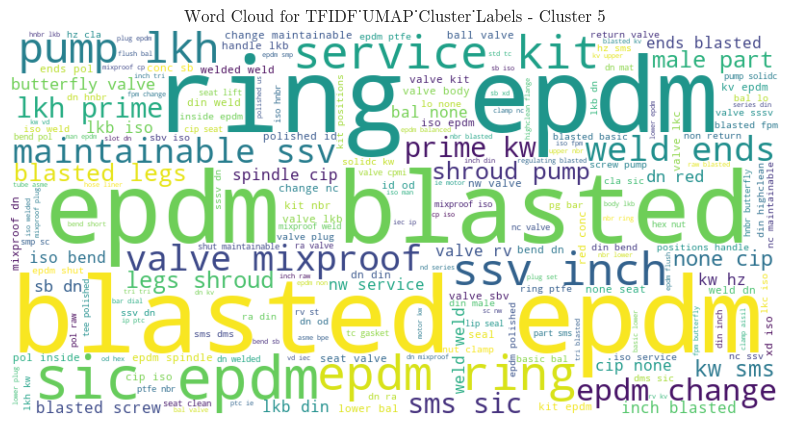

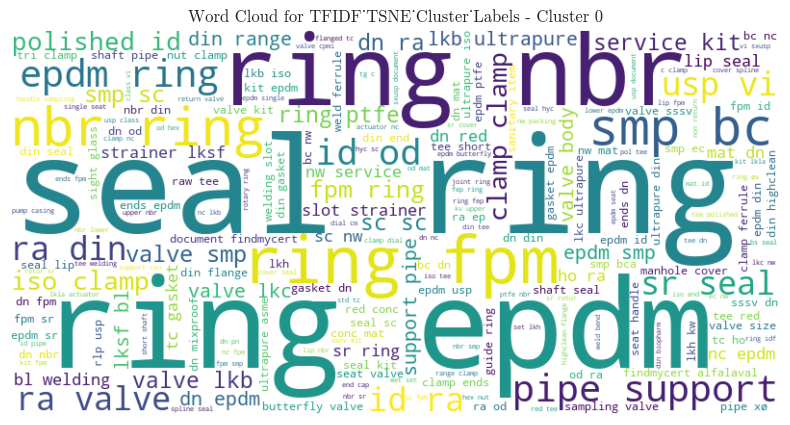

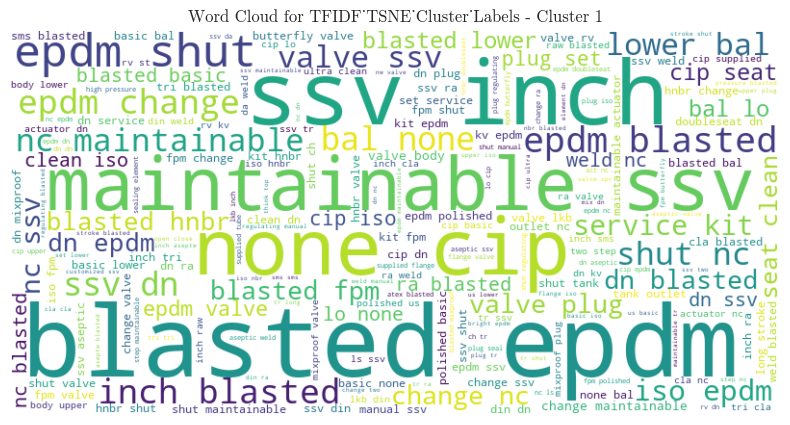

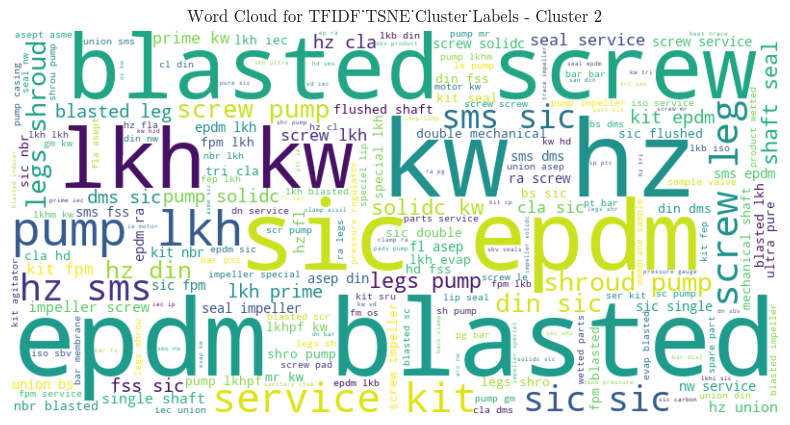

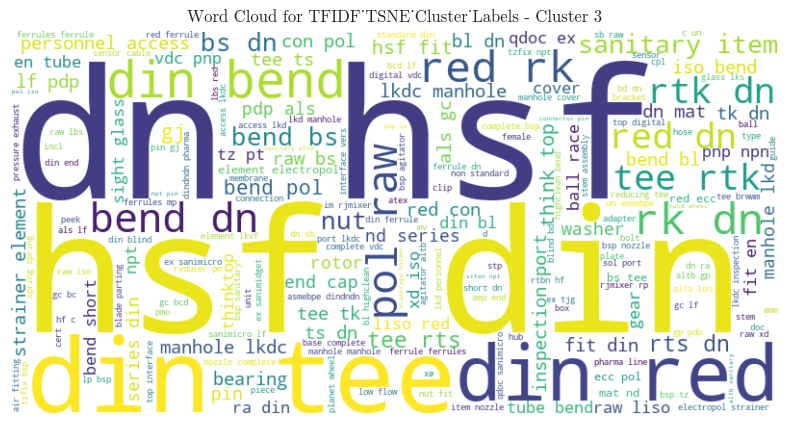

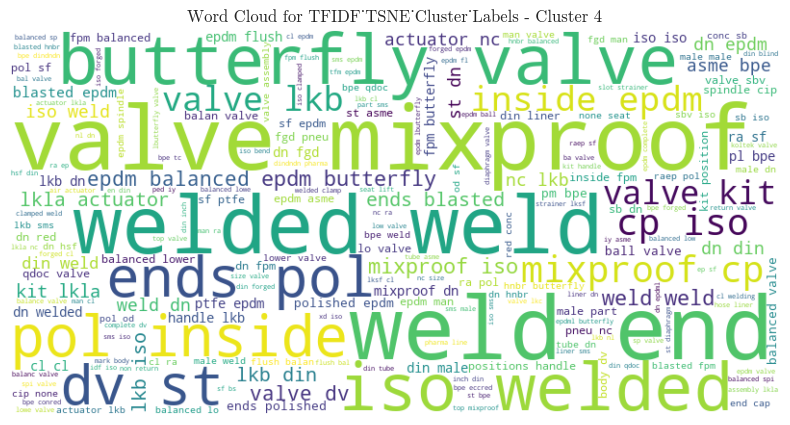

In [48]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data loading (replace this with your actual data loading method)
# df = pd.read_csv('your_data.csv')

# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Iterate over each cluster label column
for column in df.columns:
    if column.endswith('Cluster_Labels'):
        # Group by cluster label and concatenate the terms
        grouped = df.groupby(column)['description'].apply(' '.join)  # Replace 'Your_Terms_Column' with the column that contains the terms

        # Generate a word cloud for each cluster
        for cluster_label, terms in grouped.items():
            generate_word_cloud(terms, f'Word Cloud for {column} - Cluster {cluster_label}')
